In [1]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
import os
import pandas as pd
# Display array values to 6 digits of precision
np.set_printoptions(precision=4, suppress=True)

In [2]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.utils import to_categorical
batch_size = 64
epochs = 20
num_classes = 2

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D,Flatten,Dense,Activation
from mealpy.swarm_based.GWO import OriginalGWO
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from mealpy import FloatVar, ABC, GWO


In [5]:
root_dir="D:\Documents\SEM8\Data\COBRE"

In [6]:
import pandas as pd
xt1=pd.read_csv((root_dir+ '\demo.csv'))

y_target=xt1['y']

xt1 = xt1.drop(['y','age','sex'],axis=1)
print(len(y_target), len(xt1))
xt1=xt1.to_numpy()
y_target=y_target.to_numpy()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(xt1,y_target, random_state=10, test_size=0.15, shuffle=True)

141 141


SVM

Accuracy:  0.6363636363636364
Precision:  0.5714285714285714
Recall:  0.8
F1 Score:  0.6666666666666666


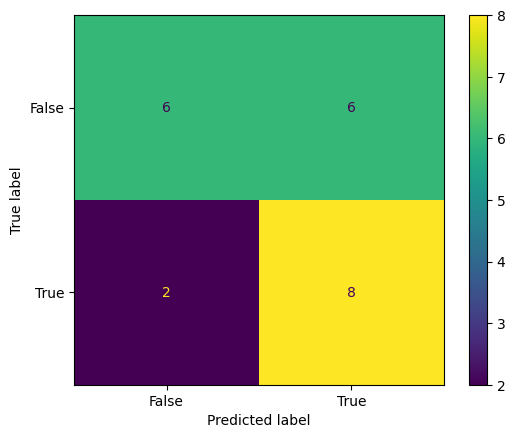

In [58]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
predlr=clf.predict(x_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)

print('Accuracy: ',accuracy_score(y_test,predlr))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True])
cm_display.plot()
plt.show()

Grid Search - SVM

Accuracy:  0.7727272727272727
Precision:  0.7272727272727273
Recall:  0.8
F1 Score:  0.7619047619047619


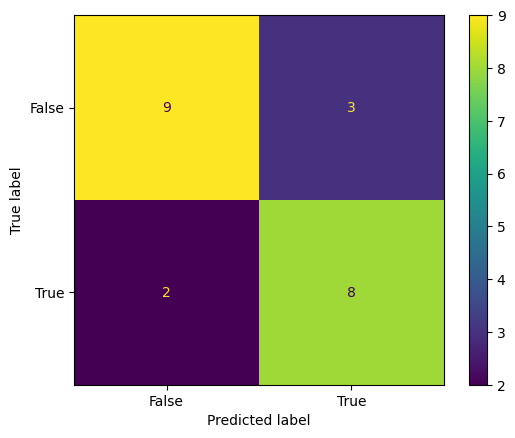

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','rbf']}

grid = GridSearchCV(SVC(), param_grid, cv = 10, scoring='accuracy', refit = True, verbose = 0)

# fitting the model for grid search
grid.fit(x_train, y_train)


predlr = grid.predict(x_test)

precision = precision_score(y_test, predlr)
recall = recall_score(y_test, predlr)

print('Accuracy: ',accuracy_score(y_test,predlr))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ', f1_score(y_test, predlr))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predlr), display_labels = [False, True])
cm_display.plot()
plt.show()

ANN

In [76]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification, change for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), 
          shuffle=True)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Epoch 1/50
8/8 [==============================] - 0s 19ms/step - loss: 1.0002 - accuracy: 0.5126 - val_loss: 0.7328 - val_accuracy: 0.5909
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7650 - accuracy: 0.6050 - val_loss: 0.7290 - val_accuracy: 0.6364
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7887 - accuracy: 0.6639 - val_loss: 0.7808 - val_accuracy: 0.5909
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.6975 - val_loss: 0.8170 - val_accuracy: 0.6364
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.7143 - val_loss: 0.8155 - val_accuracy: 0.5909
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6109 - accuracy: 0.7815 - val_loss: 0.8507 - val_accuracy: 0.5909
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6253 - accuracy: 0.7143 - val_loss: 0.8089 - val_accuracy: 0.6364
Epoch 8/50
8/8 [=================

Accuracy:  0.7272727272727273
Precision:  0.6428571428571429
Recall:  0.9
F1 Score:  0.75


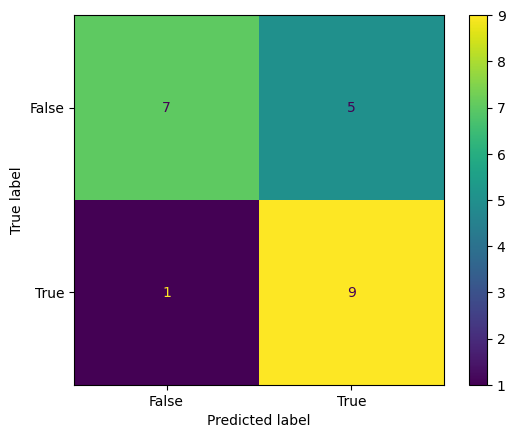

In [81]:
final_precision = precision_score(y_test, y_pred)
final_recall = recall_score(y_test, y_pred)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', final_precision)
print('Recall: ', final_recall)
print('F1 Score: ', f1_score(y_test, y_pred))

cm_display_final = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display_final.plot()
plt.show()

PSO ANN

In [140]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pyswarm import pso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the neural network model
def create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate):
    model = Sequential([
        Dense(hidden_layer1_size, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_layer2_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the evaluation function
def evaluate(params):
    hidden_layer1_size, dropout_rate = params
    hidden_layer2_size = 64  # You can set this to a default value or optimize it further
    model = create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate)
    
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, verbose=0)
    
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return -accuracy  # PSO minimizes the objective function, so we use negative accuracy
# PSO minimizes the objective function, so we use negative accuracy

# Define the search space bounds
lb = [16, 0.2]  # Lower bounds for hidden layer size and dropout rate
ub = [128, 0.8]  # Upper bounds for hidden layer size and dropout rate
best_params, _ = pso(evaluate, lb, ub, swarmsize=20, maxiter=10)
best_hidden_layer1_size, best_dropout_rate = best_params
# Create and train the final model with the best hyperparameters
best_hidden_layer2_size = 64  # You can set this to a default value or optimize it further
final_model = create_model(best_hidden_layer1_size, best_hidden_layer2_size, best_dropout_rate)
final_model.fit(X_train_scaled, y_train, epochs=64, batch_size=16, validation_data=(X_test_scaled, y_test), 
                shuffle=True)

# Evaluate the final model
y_pred_prob_final = final_model.predict(X_test_scaled)
y_pred_final = (y_pred_prob_final > 0.5).astype(int)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f'Final Test Accuracy: {accuracy_final}')


1/1 [==============================] - 0s 34ms/step
Stopping search: maximum iterations reached --> 10
Epoch 1/64
8/8 [==============================] - 0s 20ms/step - loss: 1.0595 - accuracy: 0.5126 - val_loss: 0.8318 - val_accuracy: 0.5000
Epoch 2/64
8/8 [==============================] - 0s 11ms/step - loss: 0.7517 - accuracy: 0.6218 - val_loss: 0.8592 - val_accuracy: 0.5455
Epoch 3/64
8/8 [==============================] - 0s 11ms/step - loss: 0.6547 - accuracy: 0.6975 - val_loss: 0.8681 - val_accuracy: 0.5455
Epoch 4/64
8/8 [==============================] - 0s 11ms/step - loss: 0.5452 - accuracy: 0.7563 - val_loss: 0.8134 - val_accuracy: 0.6364
Epoch 5/64
8/8 [==============================] - 0s 12ms/step - loss: 0.4737 - accuracy: 0.7983 - val_loss: 0.8336 - val_accuracy: 0.6364
Epoch 6/64
8/8 [==============================] - 0s 12ms/step - loss: 0.5641 - accuracy: 0.8235 - val_loss: 0.8249 - val_accuracy: 0.6364
Epoch 7/64
8/8 [==============================] - 0s 12ms/step 

Grey Wolf ANN

In [141]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

def create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate):
    model = Sequential([
        Dense(hidden_layer1_size, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_layer2_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Define the evaluation function
def evaluate(params):
    hidden_layer1_size, hidden_layer2_size, dropout_rate = params
    model = create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate)
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, verbose=0)
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # GWO minimizes the objective function, so we use negative accuracy

# Define the bounds for GWO
lb = [16, 16, 0.2]  # Lower bounds for hidden layer sizes and dropout rate
ub = [128, 128, 0.8]  # Upper bounds for hidden layer sizes and dropout rate

# Run GWO optimization
problem_dict1 = {
    "bounds": FloatVar(lb = [16, 16, 0.2],ub = [128, 128, 0.8]),
    "minmax": "min",
    "obj_func": evaluate
}
model = OriginalGWO(epoch=10, pop_size=30, a_min = 0.02, a_max = 2.2)
g_best = model.solve(problem_dict1)

# Extract the best hyperparameters
best_hidden_layer1_size, best_hidden_layer2_size, best_dropout_rate = g_best.solution

# Create and train the final model with the best hyperparameters
final_model = create_model(best_hidden_layer1_size, best_hidden_layer2_size, best_dropout_rate)
final_model.fit(X_train_scaled, y_train, epochs=64, batch_size=16, 
                validation_data=(X_test_scaled, y_test), shuffle=True)

# Evaluate the final model
y_pred_prob_final = final_model.predict(X_test_scaled)
y_pred_final = (y_pred_prob_final > 0.5).astype(int)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f'Final Test Accuracy: {accuracy_final}')




1/1 [==============================] - 0s 32ms/step


2024/02/09 01:17:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.
2024-02-09 13:17:21,575 - mealpy.swarm_based.GWO.OriginalGWO - INFO - Solving single objective optimization problem.


1/1 [==============================] - 0s 32ms/step


2024/02/09 01:18:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 23.81716 seconds
2024-02-09 13:18:09,592 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 1, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 23.81716 seconds


1/1 [==============================] - 0s 35ms/step


2024/02/09 01:18:33 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 23.56274 seconds
2024-02-09 13:18:33,156 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 2, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 23.56274 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 01:18:57 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 23.91847 seconds
2024-02-09 13:18:57,075 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 3, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 23.91847 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 01:19:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.04975 seconds
2024-02-09 13:19:21,128 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 4, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.04975 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 01:19:45 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.34106 seconds
2024-02-09 13:19:45,470 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 5, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.34106 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 01:20:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.32684 seconds
2024-02-09 13:20:09,799 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 6, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 24.32684 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 01:20:34 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.79148 seconds
2024-02-09 13:20:34,592 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 7, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.79148 seconds


1/1 [==============================] - 0s 31ms/step


2024/02/09 01:20:59 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.44711 seconds
2024-02-09 13:20:59,040 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 8, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.44711 seconds


1/1 [==============================] - 0s 33ms/step


2024/02/09 01:21:23 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.07292 seconds
2024-02-09 13:21:23,115 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 9, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.07292 seconds


1/1 [==============================] - 0s 33ms/step


2024/02/09 01:21:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.31276 seconds
2024-02-09 13:21:47,430 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 10, Current best: -0.8181818181818182, Global best: -0.8181818181818182, Runtime: 24.31276 seconds


Epoch 1/64
8/8 [==============================] - 0s 22ms/step - loss: 2.3627 - accuracy: 0.4958 - val_loss: 0.8629 - val_accuracy: 0.5455
Epoch 2/64
8/8 [==============================] - 0s 12ms/step - loss: 2.0370 - accuracy: 0.4874 - val_loss: 0.9439 - val_accuracy: 0.5000
Epoch 3/64
8/8 [==============================] - 0s 11ms/step - loss: 2.4803 - accuracy: 0.5630 - val_loss: 1.0323 - val_accuracy: 0.6364
Epoch 4/64
8/8 [==============================] - 0s 12ms/step - loss: 1.6373 - accuracy: 0.6303 - val_loss: 1.0273 - val_accuracy: 0.5455
Epoch 5/64
8/8 [==============================] - 0s 24ms/step - loss: 2.8601 - accuracy: 0.5378 - val_loss: 1.0285 - val_accuracy: 0.5455
Epoch 6/64
8/8 [==============================] - 0s 8ms/step - loss: 2.4820 - accuracy: 0.5630 - val_loss: 0.9285 - val_accuracy: 0.5455
Epoch 7/64
8/8 [==============================] - 0s 8ms/step - loss: 2.7599 - accuracy: 0.5126 - val_loss: 0.9212 - val_accuracy: 0.5909
Epoch 8/64
8/8 [=============

Differential Evolution ANN

In [136]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import differential_evolution
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming x_train, x_test, y_train, y_test are defined previously
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the neural network model
def create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate):
    model = Sequential([
        Dense(hidden_layer1_size, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_layer2_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the evaluation function
def evaluate(params):
    hidden_layer1_size, hidden_layer2_size, dropout_rate = params
    model = create_model(hidden_layer1_size, hidden_layer2_size, dropout_rate)
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, verbose=0)
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # DE minimizes the objective function, so we use negative accuracy
# Define the bounds for DE
bounds = [(16, 128), (16, 128), (0.2, 0.8)]  # Lower and upper bounds for hidden layer sizes and dropout rate
# Run DE optimization
result = differential_evolution(evaluate, bounds, maxiter=50, popsize=10)

# Extract the best hyperparameters
best_hidden_layer1_size, best_hidden_layer2_size, best_dropout_rate = result.x

# Print the best hyperparameters and their corresponding accuracy
print(f"Best Hyperparameters: Hidden Layer 1 Size = {best_hidden_layer1_size}, 
      Hidden Layer 2 Size = {best_hidden_layer2_size}, Dropout Rate = {best_dropout_rate}")
print(f"Corresponding Test Accuracy: {-result.fun}")



1/1 [==============================] - 0s 32ms/step
Best Hyperparameters: Hidden Layer 1 Size = 51.623684345507215, Hidden Layer 2 Size = 69.53733812549125, Dropout Rate = 0.6405138261583958
Corresponding Test Accuracy: 0.8181818181818182


CNN

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Assuming x_train and x_test are 3D arrays with shape (num_samples, num_timesteps, num_features)
# If not, you may need to adjust the input shape accordingly.

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Adjust dropout rate
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), shuffle=True)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Epoch 1/50
8/8 [==============================] - 1s 27ms/step - loss: 5.7538 - accuracy: 0.5126 - val_loss: 0.9474 - val_accuracy: 0.5909
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 2.1627 - accuracy: 0.7647 - val_loss: 0.8832 - val_accuracy: 0.5909
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 1.1512 - accuracy: 0.8908 - val_loss: 0.6603 - val_accuracy: 0.6364
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4418 - accuracy: 0.9076 - val_loss: 0.7667 - val_accuracy: 0.5909
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4389 - accuracy: 0.9580 - val_loss: 0.6359 - val_accuracy: 0.6818
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.1728 - accuracy: 0.9160 - val_loss: 0.6185 - val_accuracy: 0.6364
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.2736 - accuracy: 0.9496 - val_loss: 0.6301 - val_accuracy: 0.6818
Epoch 8/50
8/8 [===========

Differential Evolution CNN

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import differential_evolution
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
def create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the objective function for DE (negative accuracy as DE minimizes)
def objective_function(params):
    neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2 = params
    model = create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = -accuracy_score(y_test, y_pred)
    return accuracy


# Define parameter bounds for DE
bounds = [(16, 128), (0.1, 0.5), (16, 128), (0.1, 0.5)]

# Run Differential Evolution
result = differential_evolution(objective_function, bounds, maxiter=10, popsize=10, disp=True)

# Extract best hyperparameters
best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2 = result.x
print(f"Best Hyperparameters: Neurons Layer 1 = {best_neurons_layer1}, Dropout Rate 1 = {best_dropout_rate1}, 
      Neurons Layer 2 = {best_neurons_layer2}, Dropout Rate 2 = {best_dropout_rate2}")

# Create the final model with the best hyperparameters
best_model = create_model(best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2)

# Train the final model
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), 
               shuffle=True)

# Evaluate the final model on the test set
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with Best Hyperparameters: {accuracy}')


1/1 [==============================] - 0s 33ms/step
differential_evolution step 1: f(x)= -0.7272727272727273
1/1 [==============================] - 0s 33ms/step
differential_evolution step 2: f(x)= -0.7272727272727273
1/1 [==============================] - 0s 33ms/step
differential_evolution step 3: f(x)= -0.7272727272727273
1/1 [==============================] - 0s 37ms/step
differential_evolution step 4: f(x)= -0.7727272727272727
1/1 [==============================] - 0s 35ms/step
differential_evolution step 5: f(x)= -0.7727272727272727
1/1 [==============================] - 0s 32ms/step
differential_evolution step 6: f(x)= -0.7727272727272727
1/1 [==============================] - 0s 33ms/step
differential_evolution step 7: f(x)= -0.7727272727272727
1/1 [==============================] - 0s 36ms/step
differential_evolution step 8: f(x)= -0.7727272727272727
1/1 [==============================] - 0s 33ms/step
differential_evolution step 9: f(x)= -0.7727272727272727
1/1 [==============

PSO CNN

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pyswarm import pso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
def create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the objective function for PSO (negative accuracy as PSO minimizes)
def objective_function(params):
    neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2 = params
    model = create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = -accuracy_score(y_test, y_pred)
    return accuracy


# Define parameter bounds for PSO
lb = [16, 0.1, 16, 0.1]  # lower bounds for neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2
ub = [128, 0.5, 128, 0.5]  # upper bounds for neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2

# Run Particle Swarm Optimization
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10, debug=True)

# Extract best hyperparameters
best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2 = best_params
print(f"Best Hyperparameters: Neurons Layer 1 = {best_neurons_layer1}, Dropout Rate 1 = {best_dropout_rate1}, 
      Neurons Layer 2 = {best_neurons_layer2}, Dropout Rate 2 = {best_dropout_rate2}")

# Create the final model with the best hyperparameters
best_model = create_model(best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2)

# Train the final model
best_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test),
               shuffle=True)

# Evaluate the final model on the test set
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with Best Hyperparameters: {accuracy}')


No constraints given.
1/1 [==============================] - 0s 30ms/step
Best after iteration 1: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 32ms/step
Best after iteration 2: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 33ms/step
Best after iteration 3: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 30ms/step
Best after iteration 4: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 355ms/step
Best after iteration 5: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 31ms/step
Best after iteration 6: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 35ms/step
Best after iteration 7: [49.5069  0.2234 38.1525  0.4639] -0.7272727272727273
1/1 [==============================] - 0s 33ms/step
Best after iter

Grey Wolf CNN

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
def create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the objective function for GWO (negative accuracy as GWO minimizes)
def objective_function(params):
    neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2 = params
    model = create_model(neurons_layer1, dropout_rate1, neurons_layer2, dropout_rate2)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = -accuracy_score(y_test, y_pred)
    return accuracy


# Run GWO optimization
problem_dict1 = {
    "bounds": FloatVar(lb = [16, 0.1, 16, 0.1],ub = [128, 0.5, 128, 0.5]),
    "minmax": "min",
    "obj_func": objective_function
}
model = OriginalGWO(epoch=10, pop_size=30, a_min = 0.02, a_max = 2.2)
g_best = model.solve(problem_dict1)

# Extract best hyperparameters
best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2 = best_params
print(f"Best Hyperparameters: Neurons Layer 1 = {best_neurons_layer1}, Dropout Rate 1 = {best_dropout_rate1}, 
      Neurons Layer 2 = {best_neurons_layer2}, Dropout Rate 2 = {best_dropout_rate2}")

# Create the final model with the best hyperparameters
best_model = create_model(best_neurons_layer1, best_dropout_rate1, best_neurons_layer2, best_dropout_rate2)

# Train the final model
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), 
               shuffle=True)

# Evaluate the final model on the test set
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with Best Hyperparameters: {accuracy}')


1/1 [==============================] - 0s 34ms/step


2024/02/09 03:39:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


1/1 [==============================] - 0s 31ms/step


2024/02/09 03:42:30 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 80.32421 seconds


1/1 [==============================] - 0s 31ms/step


2024/02/09 03:43:52 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: -0.7272727272727273, Global best: -0.7272727272727273, Runtime: 81.58816 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 03:45:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 81.56761 seconds


1/1 [==============================] - 0s 31ms/step


2024/02/09 03:46:34 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 81.40765 seconds


1/1 [==============================] - 0s 33ms/step


2024/02/09 03:47:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 76.01059 seconds


1/1 [==============================] - 0s 32ms/step


2024/02/09 03:49:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 80.05276 seconds


1/1 [==============================] - 0s 33ms/step


2024/02/09 03:50:32 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 81.84388 seconds


1/1 [==============================] - 0s 34ms/step


2024/02/09 03:51:57 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 84.84324 seconds


1/1 [==============================] - 0s 37ms/step


2024/02/09 03:53:22 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 84.88141 seconds


1/1 [==============================] - 0s 36ms/step


2024/02/09 03:54:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: -0.7727272727272727, Global best: -0.7727272727272727, Runtime: 84.72945 seconds


Best Hyperparameters: Neurons Layer 1 = 49.50694548633396, Dropout Rate 1 = 0.223391921833813, Neurons Layer 2 = 38.15247526345142, Dropout Rate 2 = 0.4639175456668536
Epoch 1/50
8/8 [==============================] - 0s 24ms/step - loss: 0.9785 - accuracy: 0.4958 - val_loss: 1.0248 - val_accuracy: 0.5455
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.7101 - accuracy: 0.6387 - val_loss: 0.9698 - val_accuracy: 0.5909
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4887 - accuracy: 0.7479 - val_loss: 0.9564 - val_accuracy: 0.5909
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3948 - accuracy: 0.8235 - val_loss: 0.9838 - val_accuracy: 0.7273
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2800 - accuracy: 0.8908 - val_loss: 1.0019 - val_accuracy: 0.7273
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3109 - accuracy: 0.8571 - val_loss: 0.9877 - val_accuracy: 0.727